In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
df=pd.read_csv("logistic_regression.csv")
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


### Basic data exploration

In [4]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  396030
Number of Columns:  27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df['loan_amnt'].min(), df['loan_amnt'].max()

(500.0, 40000.0)

The loan amount is varying from 500 to 40,000.

In [8]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

- Nearly 20% of the loans are charged off.
- The provided data is 'imbalancced'

In [9]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The charged off loans had higher mean and standard deviation values compared to the fully paid loans.

In [10]:
df['term'].value_counts(normalize=True)*100

term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64

More than 3/4th of the customers have opted for a shorter term loan.

In [11]:
df['grade'].value_counts(normalize=True)*100

grade
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: proportion, dtype: float64

In [12]:
df['home_ownership'].value_counts(normalize = True)*100

home_ownership
MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: proportion, dtype: float64

In [13]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In the home ownership column, there are 3 different entries that doesnt really give us any information. So, let's merge these into one.

In [14]:
df.loc[(df.home_ownership=='ANY') | (df.home_ownership=='NONE'), 'home_ownership'] = 'OTHER'

In [15]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [134]:
# Changing the data type format of the date columns to Datetime.

df['issue_d']= pd.to_datetime(df['issue_d'])
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

In [18]:
df['title'].nunique()

48816

In [19]:
df['title'].value_counts()[:15]

title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
Name: count, dtype: int64

In [20]:
# changing the title column to lowercase as there are some entries that only differ in the formatting.

df['title'] = df.title.str.lower()

In [21]:
# Changing debt consolidation loan entry to debt consolidation.

df.loc[(df.title=='debt consolidation loan'),'title']= 'debt consolidation'

In [22]:
# Changing credit card refinance entry to credit card refinancing.

df.loc[(df.title=='credit card refinance'),'title']= 'credit card refinancing'

In [23]:
df['title'].value_counts()[:15]

title
debt consolidation           171621
credit card refinancing       53613
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
moving and relocation          1693
Name: count, dtype: int64

In [24]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [25]:
df.groupby('loan_status')['dti'].mean()

loan_status
Charged Off    19.656346
Fully Paid     16.824010
Name: dti, dtype: float64

Mean debt to income ratio is slightly higher for the charged off loans.

### Bivariate & Multivariate analysis

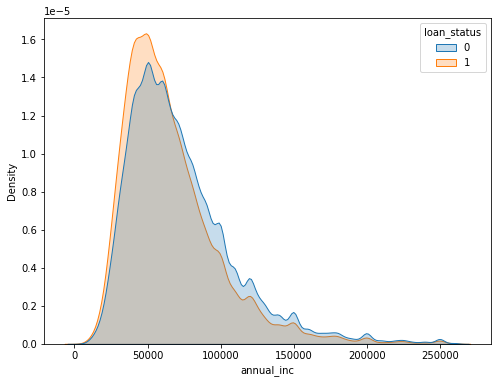

In [132]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='annual_inc', hue='loan_status', fill=True, common_norm=False)
plt.show()

- Annual income distribution seems to be similar for both fully paid and charged off loans.

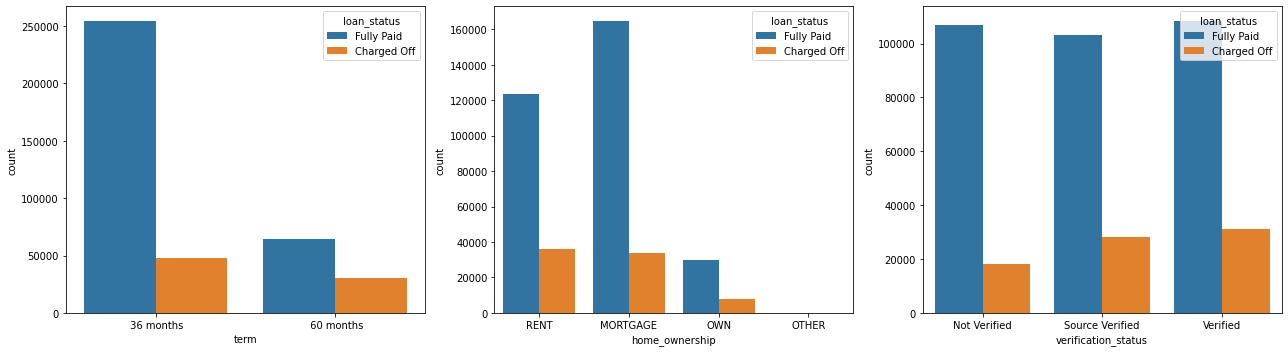

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(1,3,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(1,3,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.tight_layout()
plt.show()

- The percentage of charged off loans is higher for 60 month tenure.

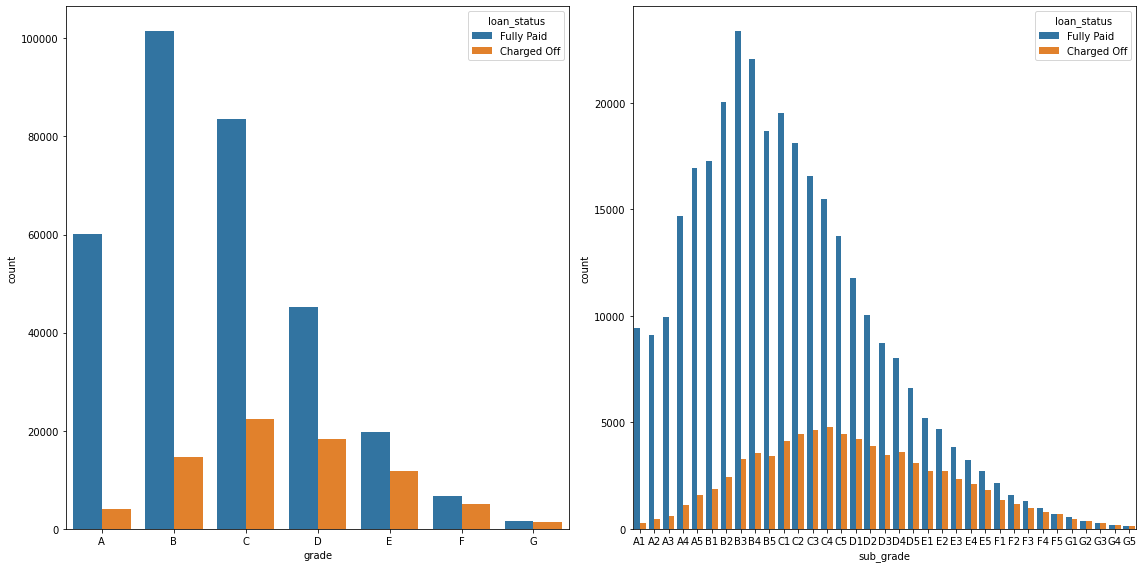

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
grade=sorted(df.grade.unique().tolist())
sns.countplot(data=df, x='grade',hue='loan_status', order=grade)

plt.subplot(1,2,2)
sub_grade=sorted(df.sub_grade.unique().tolist())
sns.countplot(data=df, x='sub_grade',hue='loan_status', order=sub_grade)

plt.tight_layout()
plt.show()

- The worst performing loans are of grade 'G' followed by 'F', 'E' and 'D'.

In [28]:
df.groupby('grade')['loan_status'].value_counts(normalize=True)*100

grade  loan_status
A      Fully Paid     93.712122
       Charged Off     6.287878
B      Fully Paid     87.426951
       Charged Off    12.573049
C      Fully Paid     78.819100
       Charged Off    21.180900
D      Fully Paid     71.132171
       Charged Off    28.867829
E      Fully Paid     62.636560
       Charged Off    37.363440
F      Fully Paid     57.212029
       Charged Off    42.787971
G      Fully Paid     52.161100
       Charged Off    47.838900
Name: proportion, dtype: float64

- Almost 94% of the grade A loans are fully paid making it the best performing grade followed by B, C, D, E, F & G.

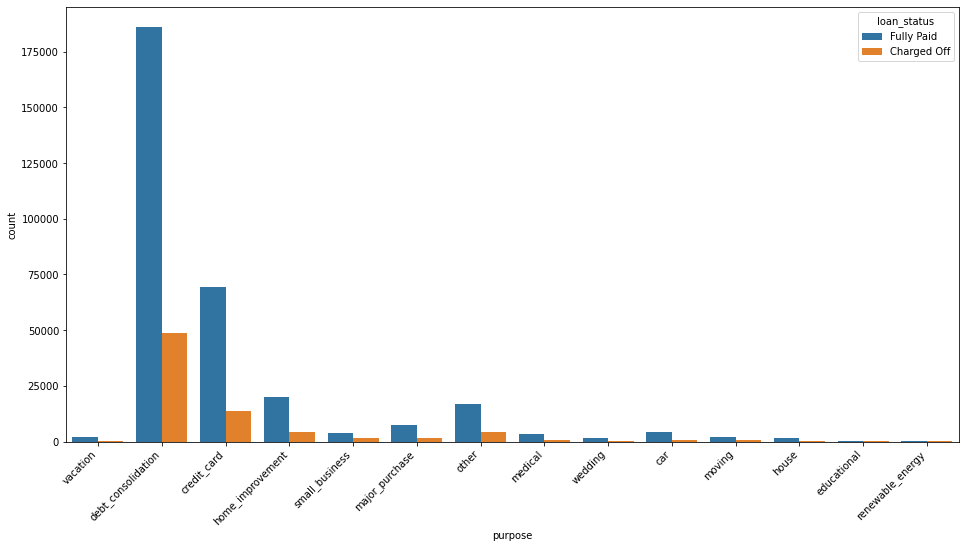

In [29]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x=df['purpose'],hue=df['loan_status'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

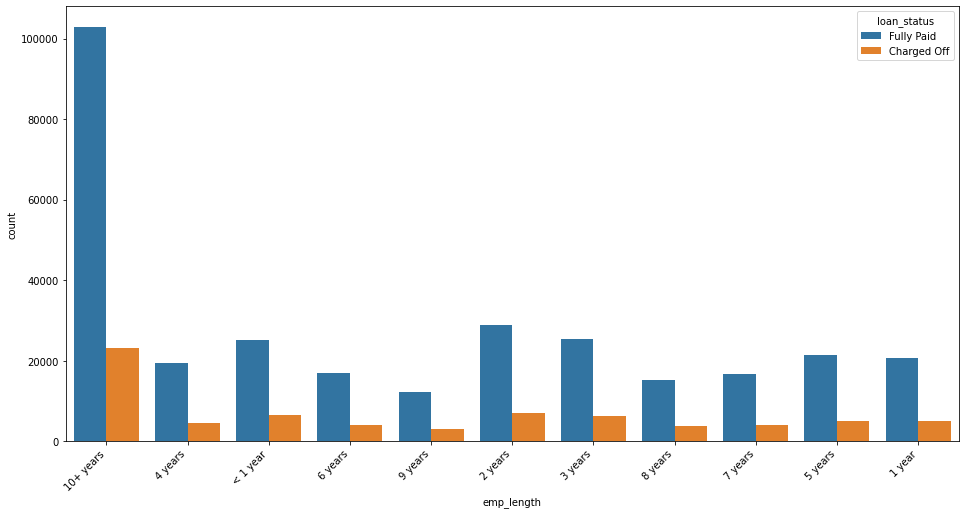

In [30]:
plt.figure(figsize=(16,8))
ax=sns.countplot(x=df['emp_length'],hue=df['loan_status'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

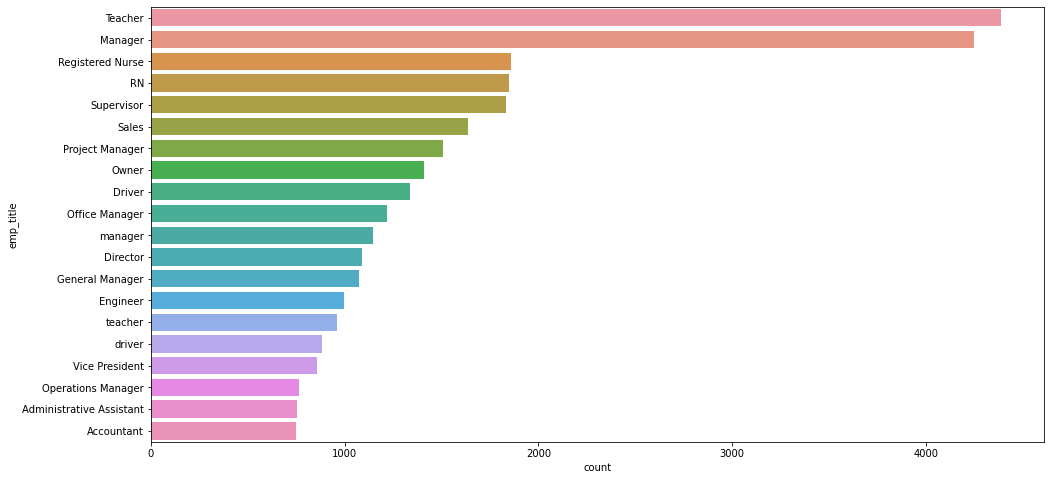

In [31]:
plt.figure(figsize=(16,8))
top_20_titles = df['emp_title'].value_counts().head(20)
sns.barplot(x=top_20_titles,y=top_20_titles.index)

plt.show()

Among all the professions teacher and manager seems to be opting more for loans.

### Feature Engineering and Data Pre-processing

In [32]:
df.duplicated().sum()

0

- There are no duplicate rows in the dataset.

In [33]:
# Encoding the loan_status column

df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

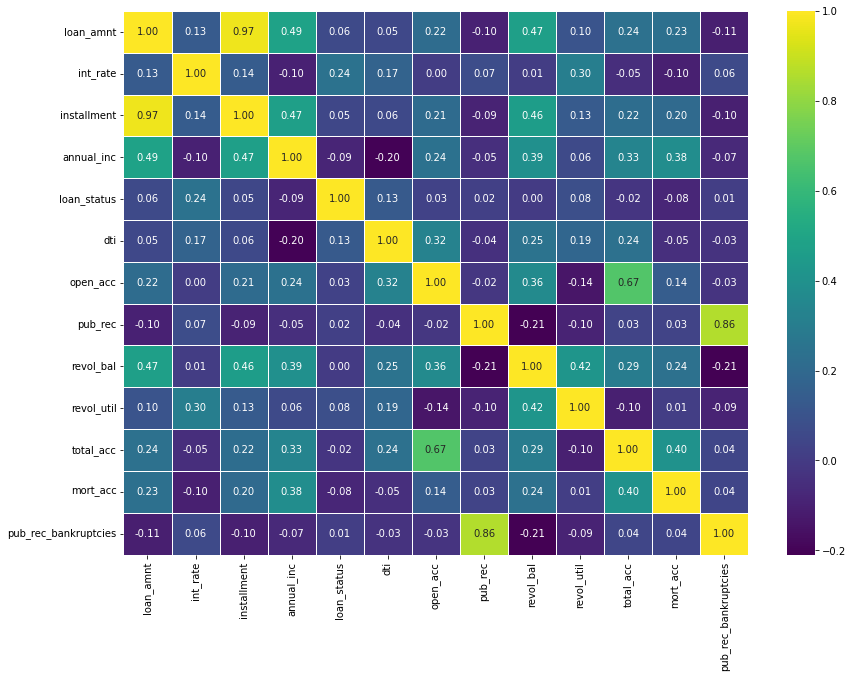

In [34]:
# Let's check the correlation between various numerical columns.

plt.figure(figsize=(14,10))
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

plt.show()

- From the above heatmap we can see a high correlation between loan_amount and installment columns. So we can drop one of the columns.

In [35]:
df.drop(columns=['installment'],axis=1,inplace=True)

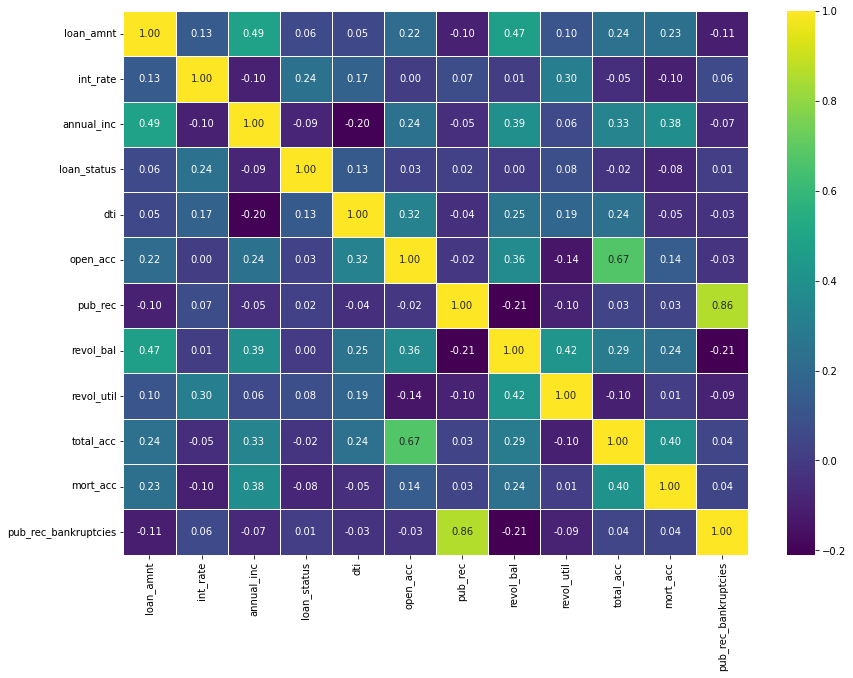

In [36]:
# Checking the correlation between various numerical columns after dropping the installments column.

plt.figure(figsize=(14,10))
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

plt.show()

In [37]:
df['pub_rec'].value_counts()

pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: count, dtype: int64

In [38]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [39]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [40]:
def pub_rec(x):
    if x==0.0:
        return 0
    else:
        return 1

In [41]:
def mort_acc(x):
    if x==0.0:
        return 0
    elif x>=1.0:
        return 1
    else:
        return x

In [42]:
def pub_rec_bankruptcies(x):
    if x==0.0:
        return 0
    elif x>=1.0:
        return 1
    else:
        return x

In [43]:
df['pub_rec'] = df['pub_rec'].apply(pub_rec)
df['mort_acc'] = df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

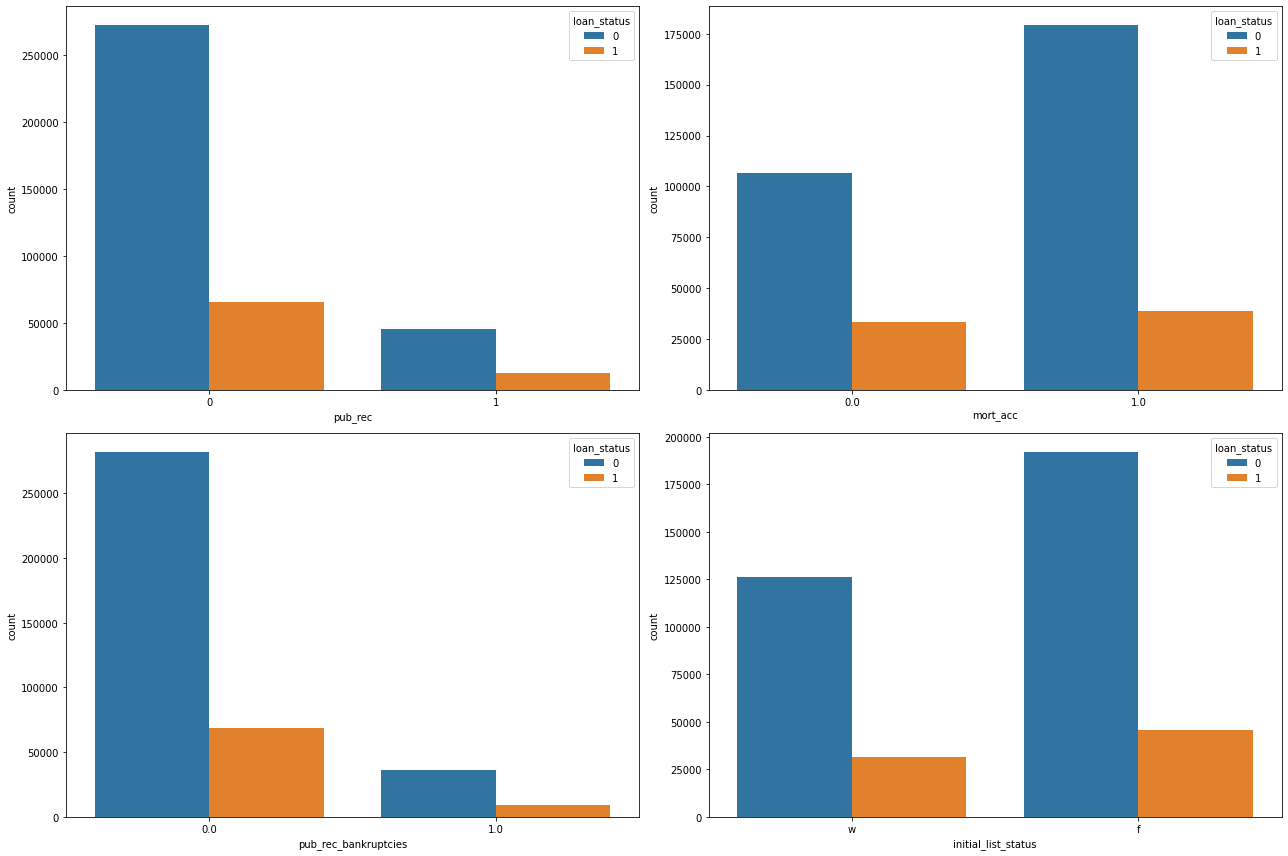

In [44]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(2,2,2)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(2,2,3)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.subplot(2,2,4)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.tight_layout()
plt.show()

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Missing data imputation

Inorder to fill the mort_acc missing values, no of total_acc's can be taken as reference.

In [46]:
# As all the mort_acc values are integers, its best to take medians of the sub-groups instead of imputing the means.

mort_acc_medians =df.groupby('total_acc')['mort_acc'].median()

In [47]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_medians[total_acc].round()
    else:
        return mort_acc

In [48]:
# Imputing mort_acc values by referencing total_acc medians

df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']),axis=1)   

Inorder to fill the pub_rec_bankruptcies missing values, no of pub_rec's can be taken as reference.

In [49]:
pub_rec_medians =df.groupby('pub_rec')['pub_rec_bankruptcies'].median()

In [50]:
def fill_pub_rec_bankruptcies(pub_rec, pub_rec_bankruptcies):
    if np.isnan(pub_rec_bankruptcies):
        return pub_rec_medians[pub_rec].round()
    else:
        return pub_rec_bankruptcies

In [51]:
# Imputing pub_rec_bankruptcies values by referencing pub_rec medians

df['pub_rec_bankruptcies'] = df.apply(lambda x: fill_pub_rec_bankruptcies(x['pub_rec'], x['pub_rec_bankruptcies']),axis=1)   

- From the dataframe we can observe that the columns 'purpose' and 'title' are very similar with some special characters in between.
- To fill the missing values in 'title' column, 'purpose' can be taken as reference.

In [52]:
title_mode = df.groupby('purpose')['title'].agg(lambda x: x.value_counts().idxmax()).to_dict()

In [53]:
def fill_title(purpose, title):
    if pd.isnull(title):
        return title_mode[purpose]
    else:
        return title

In [54]:
df['title'] = df.apply(lambda x: fill_title(x['purpose'], x['title']),axis=1) 

In [55]:
df['title'] = df['title'].str.replace('_'," ")

- Now, let's impute missing values in 'emp_length' by referring the corresponding values in 'emp_title' column.

In [56]:
# List of all the emp_titles where emp_length value is misssing.

df[df['emp_length'].isnull()]['emp_title'].unique()

array([nan, 'Retoucher', 'STORMONT VAIL HEALTHCARE', 'Mortgage Processor',
       'Wells Fargo', 'carquest', 'Caregiver', 'oparation manager',
       'One Source Tool, Inc', 'Financial Sources',
       'freelance home nursing', 'President', 'Long Agency Inc.',
       'Binghamton University ', 'State Of California', 'Retired',
       'TD Bank', 'State of Illinois', 'Everlighting, Inc.',
       'Tax Professional', 'Superb Farms', 'Liberty Tax Service',
       'Licensed ', 'penny marketing', ' driver', 'Ordway Drug Store',
       'Attorney-at-Law', 'Belk', 'courstey cler', 'Wirebond', 'Auditor',
       'Receptionist ', 'Research Analyst', 'TOP COORDINATOR',
       'security officer', 'Lead Front Desk Clerk', 'Tong Parks',
       'MILGARD', 'CAL FIRE', 'RIVER SPIRIT CASINO', 'supervisor',
       'LegacyTexas Bank', 'American Fire Equipment', 'Security Officer',
       'Instructor', 'owner', 'Transportation Coordinator', 'Owner',
       'teacher', 'US Government ', 'Home health aid',
      

In [57]:
# List of all the emp_lengths where emp_titles are missing. 

df[df['emp_title'].isnull()]['emp_length'].unique()

array([nan, '4 years', '7 years', '10+ years', '6 years', '2 years',
       '8 years', '< 1 year', '5 years', '3 years', '9 years', '1 year'],
      dtype=object)

In [58]:
# Total no.of rows where both emp_title and emp_length are missing.

len(df[df['emp_title'].isnull() & df['emp_length'].isnull()])

18123

In [59]:
# Function to calculate mode
def calculate_mode(x):
    if x.isnull().all():
        return np.nan
    else:
        return x.mode().iloc[0] if not x.mode().empty else np.nan

# Calculate the mode of 'emp_length' for each 'emp_title' group
emp_len_mode = df.groupby('emp_title')['emp_length'].agg(calculate_mode).to_dict()

# Impute missing values in 'emp_length' based on the mode
df['emp_length'] = df.apply(lambda row: emp_len_mode.get(row['emp_title'], None) if pd.isnull(row['emp_length']) else row['emp_length'], axis=1)

In [60]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18208
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

- Even after imputing, there are still many missing values in emp_length and emp_title columns. There is no such column to refer for imputing the missing values in emp_title and emp_length columns.
- So, let's remove the rows with missing fields.

In [61]:
df.dropna(inplace=True)

In [62]:
df.shape

(372758, 26)

### Outlier Treatment

In [63]:
# Let's create a list of all the column names with numerical data.

numerical_col=df.select_dtypes(include='number').columns
numerical_col

Index(['loan_amnt', 'int_rate', 'annual_inc', 'loan_status', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

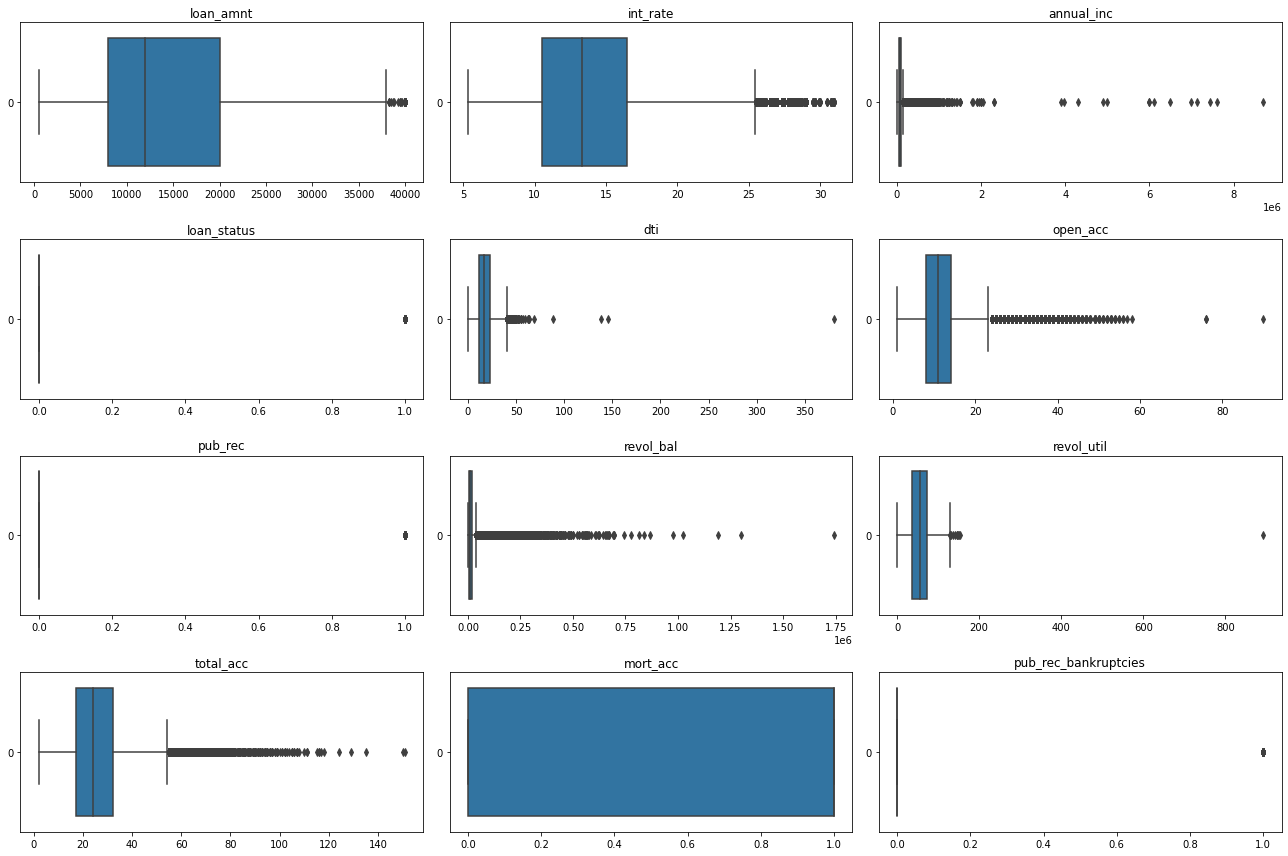

In [64]:
plt.figure(figsize=(18, 12))
for i in range(len(numerical_col)):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[numerical_col[i]],orient='h')
    plt.title(f"{numerical_col[i]}")
plt.tight_layout()

- There are outliers in most of the numerical columns. So lets remove them.

In [65]:
# Removing the outliers using 3-standard deviation rule.

for columns in numerical_col:
    lower_limit = df[columns].mean() - 3*df[columns].std()
    upper_limit = df[columns].mean() + 3*df[columns].std()
    
    df= df[(df[columns]<upper_limit) & (df[columns]>lower_limit)]

In [66]:
df.shape

(356518, 26)

In [67]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [68]:
# Converting categorical data in initial_list_status to numerical.

df['initial_list_status'] = df['initial_list_status'].map({'w':0 , 'f': 1})

In [69]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [70]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [71]:
# Extracting zipcode from the address column

df['zipcode']=df.address.apply(lambda x: x[-5:])

In [72]:
df['zipcode'].value_counts(normalize = True)*100

zipcode
70466    14.376553
30723    14.287077
22690    14.268845
48052    14.130282
00813    11.614561
29597    11.534901
05113    11.512182
11650     2.772090
93700     2.772090
86630     2.731419
Name: proportion, dtype: float64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356518 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             356518 non-null  float64       
 1   term                  356518 non-null  int64         
 2   int_rate              356518 non-null  float64       
 3   grade                 356518 non-null  object        
 4   sub_grade             356518 non-null  object        
 5   emp_title             356518 non-null  object        
 6   emp_length            356518 non-null  object        
 7   home_ownership        356518 non-null  object        
 8   annual_inc            356518 non-null  float64       
 9   verification_status   356518 non-null  object        
 10  issue_d               356518 non-null  datetime64[ns]
 11  loan_status           356518 non-null  int64         
 12  purpose               356518 non-null  object        
 13  titl

In [74]:
df['issue_year'] = df['issue_d'].dt.year
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [75]:
# Dropping the issue_d and earliest_cr_line columns as we already extracted years from them.

df.drop(columns=['issue_d','earliest_cr_line'], axis = 1, inplace = True)

In [76]:
df.drop(columns=['address'], axis = 1, inplace = True)

#### Frequency mapping

In [77]:
# Frequency mapping the emp_title column.

emp_title_frequency_map = df['emp_title'].value_counts().to_dict()
df['emp_title'] = df['emp_title'].map(emp_title_frequency_map)

In [78]:
# Frequency mapping the title column.

title_frequency_map = df['title'].value_counts().to_dict()
df['title'] = df['title'].map(title_frequency_map)

In [79]:
# Frequency mapping the emp_length column.

emp_length_frequency_map = df['emp_length'].value_counts().to_dict()
df['emp_length'] = df['emp_length'].map(emp_length_frequency_map)

In [80]:
# Frequency mapping the sub_grade column.

sub_grade_frequency_map = df['sub_grade'].value_counts().to_dict()
df['sub_grade'] = df['sub_grade'].map(sub_grade_frequency_map)

#### One-hot encoding

In [81]:
columns_to_encode = ['purpose', 'zipcode', 'grade', 'verification_status', 'application_type', 'home_ownership']
df= pd.get_dummies(df,columns = columns_to_encode, drop_first = True)

In [82]:
df.shape

(356518, 55)

In [83]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,annual_inc,loan_status,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_year,earliest_cr_line_year,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,23316,82,117679,117000.0,0,1671,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,2015,1990,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,20056,3,22663,65000.0,0,156190,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,2015,2004,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,15600.0,36,10.49,24160,10,30066,43057.0,0,47932,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,2015,2007,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True
3,7200.0,36,6.49,8574,1,19835,54000.0,0,47932,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,2014,2006,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,24375.0,60,17.27,16425,1,14522,55000.0,1,47932,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,2013,1999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [84]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [85]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,annual_inc,loan_status,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,issue_year,earliest_cr_line_year,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,23316,82,117679,117000.0,0,1671,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,2015,1990,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,20056,3,22663,65000.0,0,156190,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,2015,2004,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,24160,10,30066,43057.0,0,47932,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,2015,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,7200.0,36,6.49,8574,1,19835,54000.0,0,47932,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,2014,2006,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.0,60,17.27,16425,1,14522,55000.0,1,47932,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,2013,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


### Data preparation

In [86]:
X = df.drop('loan_status', axis=1)
y=df['loan_status']

In [87]:
# Importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
X_train.shape, X_test.shape

((249562, 54), (106956, 54))

### Standardizing the columns using StandardScaler

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [93]:
log_reg = LogisticRegression(max_iter=1000)

In [94]:
# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [95]:
# Predictions on the training set
train_predictions = log_reg.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8911212444202242


In [96]:
# Model coefficients with column names
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

In [97]:
# Creating a DataFrame to display coefficients with column names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

print("Model Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept}\n")


Model Coefficients:
                                Feature  Coefficient
0                             loan_amnt     0.122185
1                                  term     0.183110
2                              int_rate     0.094556
3                             sub_grade    -0.010790
4                             emp_title     0.016769
5                            emp_length    -0.012197
6                            annual_inc    -0.176200
7                                 title     0.105397
8                                   dti     0.185084
9                              open_acc     0.123799
10                              pub_rec     0.065128
11                            revol_bal    -0.083890
12                           revol_util     0.105392
13                            total_acc    -0.109258
14                  initial_list_status     0.026764
15                             mort_acc    -0.040245
16                 pub_rec_bankruptcies    -0.064992
17                        

#### Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
# Predictions on the testing set
y_pred = log_reg.predict(X_test)

# Creating confusion matrix
confusion_mat = confusion_matrix(y_true= y_test, y_pred=y_pred)

In [101]:
confusion_mat

array([[85845,   580],
       [10950,  9581]], dtype=int64)

#### Classification Report

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     86425
           1       0.94      0.47      0.62     20531

    accuracy                           0.89    106956
   macro avg       0.91      0.73      0.78    106956
weighted avg       0.90      0.89      0.88    106956



- From the above classification report, we can observe that there is high precision but the recall and f1-score metrics are low.

- For a company like LoanTap Recall is a more important metric than the precision as they cannot let go of some risky customers as their customer base is already less compared to bigger financial institutions.

### ROC Curve

- The ROC curve is created by varying the classification threshold of the model and plotting the true positive rate against the false positive rate at each threshold. 
- The diagonal line (from the bottom-left to the top-right) represents a random classifier with no predictive power. 
- A good classifier's ROC curve will be situated toward the top-left corner, indicating high true positive rates and low false positive rates across different threshold values.

#### AUC (Area under the ROC curve)

- A higher AUC-ROC value (closer to 1) indicates better overall performance, while an AUC-ROC of 0.5 suggests a classifier performing no better than random chance.

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve

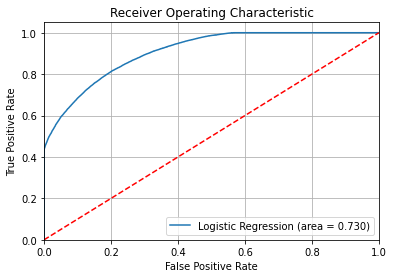

In [105]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid()
plt.show()

- Area under the ROC curve is 0.73. This has to be closer to 1 to get a well performing model.

### Precision - Recall curve

In [106]:
from sklearn.metrics import precision_recall_curve

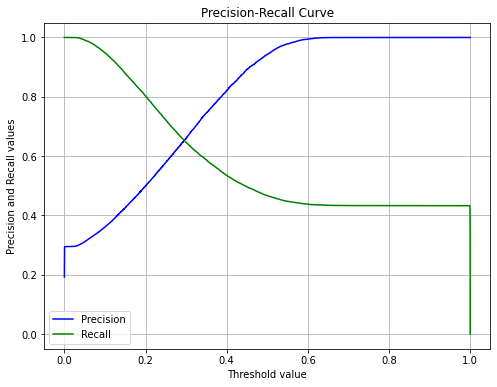

In [107]:
y_scores = log_reg.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], color='blue', label='Precision')
plt.plot(thresholds, recall[:-1], color='green', label='Recall')

plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall values')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.savefig('Precision-Recall curve')
plt.grid()
plt.show()

- The trade-off threshold value is less for our initial logistic regression model. So, the model will predict more outcomes as positive which in turn might be increasing False Positives. False positives are the NPAs (Non performing assets) to LoanTap.
- So we should try to increase threshold value which will help to increase the true positives. But keeping too high values for threshold will increase False Negatives.

### Checking Multicollinearity using VIF (Variance Inflation Factor)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# Creating a function to calculate VIF for all the columns

def calc_vif(X):
    # Calculating the VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [110]:
calc_vif(X)[:5]

,Feature,VIF
17,issue_year,113281.14
18,earliest_cr_line_year,107929.73
49,application_type_INDIVIDUAL,4685.17
2,int_rate,126.00
3,sub_grade,56.64


- In general, a VIF (Variance Inflation Factor) value of 10 or higher is often considered an indication of potential multicollinearity in the data.
- So, let's remove the features that has VIF score greater than 10 one after the other and check VIF after every step.

In [111]:
X.drop(columns=['issue_year'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
17,earliest_cr_line_year,4652.17
48,application_type_INDIVIDUAL,4496.78
2,int_rate,126.00
3,sub_grade,56.64
19,purpose_debt_consolidation,54.18


In [112]:
X.drop(columns=['earliest_cr_line_year'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
47,application_type_INDIVIDUAL,182.70
2,int_rate,125.24
3,sub_grade,56.35
18,purpose_debt_consolidation,53.50
1,term,27.30


In [113]:
X.drop(columns=['application_type_INDIVIDUAL'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,int_rate,109.74
3,sub_grade,48.63
18,purpose_debt_consolidation,34.87
1,term,24.64
9,open_acc,13.82


In [114]:
X.drop(columns=['int_rate'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,sub_grade,46.55
17,purpose_debt_consolidation,30.66
1,term,23.91
8,open_acc,13.72
12,total_acc,12.76


In [115]:
X.drop(columns=['sub_grade'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
16,purpose_debt_consolidation,25.24
1,term,23.38
7,open_acc,13.67
11,total_acc,12.76
10,revol_util,9.08


In [116]:
X.drop(columns=['purpose_debt_consolidation'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,term,19.79
7,open_acc,13.25
11,total_acc,12.76
10,revol_util,8.39
4,annual_inc,7.87


In [117]:
X.drop(columns=['term'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
6,open_acc,13.16
10,total_acc,12.72
9,revol_util,8.33
3,annual_inc,7.83
5,dti,7.75


In [118]:
X.drop(columns=['open_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
9,total_acc,8.34
8,revol_util,8.02
3,annual_inc,7.75
5,dti,7.23
0,loan_amnt,6.75


### Cross Validation

In [119]:
X_cv= scaler.fit_transform(X)

In [120]:
from sklearn.model_selection import cross_val_score, KFold

In [121]:
kfold = KFold(n_splits=5)

In [122]:
cross_validation_score = np.mean(cross_val_score(log_reg, X_cv, y, cv=kfold, n_jobs=-1))

In [123]:
print('Cross Validation Accuracy: ', cross_validation_score)

Cross Validation Accuracy:  0.8912958018623758


### Class weights balance the data

In [124]:
from sklearn.utils.class_weight import compute_class_weight

In [125]:
# Computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

In [126]:
# Creating and training the model with class weights
log_reg_balanced = LogisticRegression(class_weight=class_weight_dict , max_iter=1000)
log_reg_balanced.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_class_weights = log_reg_balanced.predict(X_test)

#### Classification report for the improved model

In [127]:
print(classification_report(y_true=y_test, y_pred=y_pred_class_weights))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     86425
           1       0.49      0.82      0.61     20531

    accuracy                           0.80    106956
   macro avg       0.72      0.81      0.74    106956
weighted avg       0.86      0.80      0.82    106956



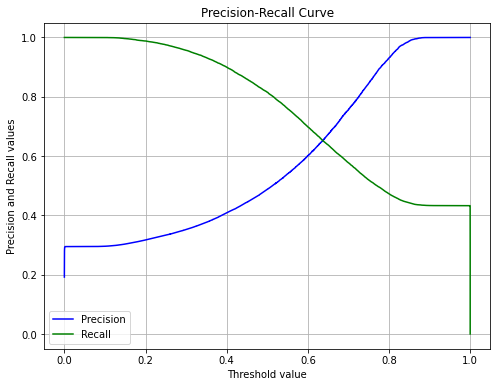

In [128]:
y_scores_clw = log_reg_balanced.predict_proba(X_test)[:, 1] 

precision_clw, recall_clw, thresholds_clw = precision_recall_curve(y_test, y_scores_clw)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds_clw, precision_clw[:-1], color='blue', label='Precision')
plt.plot(thresholds_clw, recall_clw[:-1], color='green', label='Recall')

plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall values')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.savefig('Precision-Recall curve - Improved')
plt.grid()
plt.show()